In [1]:
import pandas as pd
import numpy as np
from beepy import beep

In [2]:
X = pd.read_csv("../data/forecasts_for_ml/X.csv").values
y = pd.read_csv("../data/forecasts_for_ml/y.csv")
X_final = pd.read_csv("../data/forecasts_for_ml/X_final.csv").values
preds = pd.read_csv("../data/predictions/predictions-final-11-17.csv")

In [3]:
estimators = []

In [4]:
print(f"note: we have {len(y)} records\n {round(1/6, 3)} we have a class imbalance issue maybe fix ")
y.value_counts() / len(y)
y = y.values.ravel()

note: we have 273500 records
 0.167 we have a class imbalance issue maybe fix 


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_final = scaler.fit_transform(X_final)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [7]:

# y = np.unique(y, return_inverse=True)[1]
# y = y.astype(int)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=(34,)))
# model.add(keras.layers.Dense(3000, activation="relu"))
# model.add(keras.layers.Dense(3000, activation="relu"))
# model.add(keras.layers.Dense(6, activation="softmax"))

# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="sgd",
#               metrics=["accuracy"])

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
#                                                   restore_best_weights=True)

# history = model.fit(X_train, y_train, epochs=3000,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[early_stopping_cb])

# loss, acc = model.evaluate(X_test, y_test)


In [8]:

print(acc)
beep()
# model = keras.models.load_model(new_name)

NameError: name 'acc' is not defined

In [ ]:
# Benchmark
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=5e3)
logit.fit(X_train, y_train)
estimators.append(('logistic', logit))
yhat = logit.predict(X_test)
beep()

In [ ]:
sum(yhat == y_test) / len(yhat)


0.26489422825803083

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
mean_cv_score = []
kval = []

# for nieghbors in range(150, 250, 100):
#     knn = KNeighborsClassifier(n_neighbors=nieghbors)
#     cv = cross_val_score(knn, X_train, y_train, cv=3)
#     mean_cv_score.append(np.mean(cv).round(3))
#     kval.append(nieghbors)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=200)
estimators.append(('knn', knn))
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)
sum(yhat == y_test) / len(yhat)

0.2735492295638548

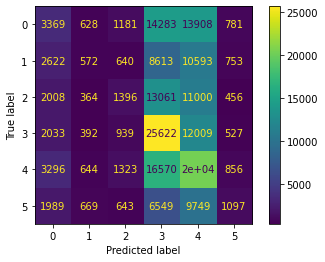

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgboost = XGBClassifier()
estimators.append(('xgb', xgboost))
xgboost.fit(X_train, y_train)
yhat = xgboost.predict(X_test)

In [ ]:

sum(yhat == y_test) / len(yhat)

0.28897884565160614

In [ ]:
from sklearn.ensemble import VotingClassifier
# ensemble = VotingClassifier(estimators, voting='soft')
# ensemble.fit(X_train, y_train)
# yhat = ensemble.predict(X_test)
# sum(yhat == y_test) / len(yhat)

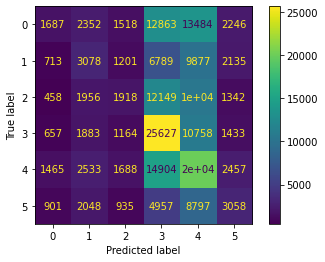

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot()


In [ ]:
fcst = preds.iloc[:, 2:].values

In [ ]:
xgb_weights = xgboost.predict_proba(X_final)

In [ ]:
final = (fcst * xgb_weights).sum(axis=1)

In [ ]:
sub = pd.DataFrame(final, columns=["sales"])
sub["id"] = sub.index
sub = sub[["id", "sales"]]
sub.to_csv("../data/submissions/another.csv", index=False)

In [ ]:
sub

,id,sales
0,0,15.413712
1,1,16.241337
2,2,15.799363
3,3,15.849007
4,4,15.295787
...,...,...
44995,44995,72.575195
44996,44996,72.602611
44997,44997,75.554702
44998,44998,76.838357
